In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from urllib.parse import urlparse, parse_qs # parsing urls
import string
import re
from sys import platform
import os

# default
PATH_DELIMITER = '\\'
path = "C:\\Users\\georg\\Dropbox\\url_classifier\\runs\\"
plot_path = "C:\\Users\\georg\\Dropbox\\url_classifier\\plots"
if platform == 'darwin':
    # OSX
    PATH_DELIMITER = '/'
    path = os.getcwd() + '/runs'
    plot_path = os.getcwd() + '/plots'
    
folder = os.path.basename(path)
print('folder', folder)
print('runs', path)
print('plots', plot_path)

folder runs
runs /Users/aloha/Projects/URLNet/runs
plots /Users/aloha/Projects/URLNet/plots


In [2]:
CHAR = 1
WORD = 2 # delim = 0
CHAR_AND_WORD = 3
CHARWORD_AND_WORD = 4
CHARWORD_AND_WORD_AND_CHAR = 5

In [24]:
tmp = pd.DataFrame()
df = pd.DataFrame()
tfpr = pd.DataFrame()
auc = pd.DataFrame()

for folder in os.listdir(path):
    try:
        #print(folder)
        trainsize = re.match('(^\d+)', folder).group(0)
        emb = re.match('^\d+_emb(\d)', folder).group(1)
        dlm = re.match('^\d+_emb\d_dlm(\d)', folder).group(1)
        expert = re.match('.*expert(\d)', folder).group(1)
        
        # extract first table
        tmp = pd.read_csv(path + PATH_DELIMITER + folder + PATH_DELIMITER + 'train_' + trainsize + '_test_' + trainsize + '.auc', 
                         skiprows = 6, sep = '\t', header = 0, names=["decision_boundery", "TP", "FP", "TPR", "FPR"], nrows = 21)
        tmp['folder'] = folder 
        tmp['train_size'] = int(trainsize)
        tmp['embed_mode'] = int(emb)
        tmp['delimit_mode'] = int(dlm)
        tmp['expert_mode'] = int(expert)
        df = df.append(tmp, ignore_index= True) 
     
        # extract second table
        tmp = []
        tmp = pd.read_csv(path + PATH_DELIMITER + folder + PATH_DELIMITER + 'train_' + trainsize + '_test_' + trainsize + '.auc', 
                         skiprows = 31, sep = '\t', header = 0, names=["FPR", "TPR"], nrows = 6)
        tmp['folder'] = folder 
        tmp['train_size'] = int(trainsize)
        tmp['embed_mode'] = int(emb)
        tmp['delimit_mode'] = int(dlm)
        tmp['expert_mode'] = int(expert)
        tfpr = tfpr.append(tmp, ignore_index= True) 
        
        # extract auc
        tmp = []
        tmp = pd.read_csv(path + PATH_DELIMITER + folder + PATH_DELIMITER + 'train_' + trainsize + '_test_' + trainsize + '.auc', 
                         skiprows = 39, sep = '\t', header = None, usecols=[1], names=["AUC"], nrows = 1)
        tmp['folder'] = folder 
        tmp['train_size'] = int(trainsize)
        tmp['embed_mode'] = int(emb)
        tmp['delimit_mode'] = int(dlm)
        tmp['expert_mode'] = int(expert)
        auc = auc.append(tmp, ignore_index= True) 
 
        # print(folder + ' ; ' + trainsize + ' ; ' + emb + ' ; '+ 'No of rows: ' + str(df.shape[0]))
   
    except Exception as e:
        print(e)
        #print(folder)
        pass

'NoneType' object has no attribute 'group'
'NoneType' object has no attribute 'group'


In [4]:
df.head()
tfpr.head()
auc.head()

,AUC,folder,train_size,embed_mode,delimit_mode,expert_mode
0,0.984357,500000_emb4_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,4,1,0
1,0.180092,1000_emb3_dlm1_32dim_minwf1_1conv3456_5ep_expert1,1000,3,1,1
2,0.980479,500000_emb2_dlm0_32dim_minwf1_1conv3456_5ep_ex...,500000,2,0,0
3,0.111927,10000_emb3_dlm1_32dim_minwf1_1conv3456_5ep_exp...,10000,3,1,1
4,0.984057,500000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,5,1,1


In [5]:
df.shape

(1113, 10)

In [6]:
tmp = pd.DataFrame()
dfsvm = pd.DataFrame()
tfprsvm = pd.DataFrame()
aucsvm = pd.DataFrame()

for file in os.listdir(path + PATH_DELIMITER + 'SVM_AUC'):
    try:
        #print(folder)
        trainsize = re.match('(^\d+)', file).group(0)
        ker = re.match('^\d+_([\w\d]+)plot', file).group(1)
        
        # extract first table
        tmp = pd.read_csv(path + PATH_DELIMITER + 'SVM_AUC' + PATH_DELIMITER + file,  
                         skiprows = 6, sep = '\t', header = 0, names=["decision_boundery", "TP", "FP", "TPR", "FPR"], nrows = 21)
        tmp['folder'] = file 
        tmp['train_size'] = int(trainsize)
        tmp['embed_mode'] = 0
        tmp['delimit_mode'] = 0
        tmp['expert_mode'] = 0
        dfsvm = dfsvm.append(tmp, ignore_index= True) 
      
        # extract second table
        tmp = []
        tmp = pd.read_csv(path + PATH_DELIMITER + 'SVM_AUC' + PATH_DELIMITER + file,  
                          skiprows = 31, sep = '\t', header = 0, names=["FPR", "TPR"], nrows = 6)
        tmp['folder'] = file 
        tmp['train_size'] = int(trainsize)
        tmp['embed_mode'] = 0
        tmp['delimit_mode'] = 0
        tmp['expert_mode'] = 0
        tfprsvm = tfprsvm.append(tmp, ignore_index= True) 
        
        # extract auc
        tmp = []
        tmp = pd.read_csv(path + PATH_DELIMITER + 'SVM_AUC' + PATH_DELIMITER + file,  
                          skiprows = 39, sep = '\t', header = None, usecols=[1], names=["AUC"], nrows = 1)
        tmp['folder'] = file 
        tmp['train_size'] = int(trainsize)
        tmp['embed_mode'] = 0
        tmp['delimit_mode'] = 0
        tmp['expert_mode'] = 0
        aucsvm = aucsvm.append(tmp, ignore_index= True)
        
        print(file + ' ; '+ 'No of rows: ' + str(dfsvm.shape[0]))
       
    except Exception as e:
        print(e)
        #print(folder)
        pass

1000_l1plot.auc ; No of rows: 21
10000_l1plot.auc ; No of rows: 42
50000_l2plot.auc ; No of rows: 63
1000_l2plot.auc ; No of rows: 84
10000_rbfplot.auc ; No of rows: 105
10000_l2plot.auc ; No of rows: 126
50000_l1plot.auc ; No of rows: 147
1000_rbfplot.auc ; No of rows: 168
50000_rbfplot.auc ; No of rows: 189


In [7]:
dfsvm.shape
# tfprsvm.shape
# aucsvm.shape

(189, 10)

In [8]:
aucsvm.head()

,AUC,folder,train_size,embed_mode,delimit_mode,expert_mode
0,0.716210,1000_l1plot.auc,1000,0,0,0
1,0.721000,10000_l1plot.auc,10000,0,0,0
2,0.803362,50000_l2plot.auc,50000,0,0,0
3,0.768141,1000_l2plot.auc,1000,0,0,0
4,0.791359,10000_rbfplot.auc,10000,0,0,0


In [9]:
df.shape

(1113, 10)

In [10]:
df = df.append(dfsvm, ignore_index = True)
tfpr = tfpr.append(tfprsvm, ignore_index = True)
auc = auc.append(aucsvm, ignore_index = True)

# plot reduces df from 1302 rows to 120 rows
df_a = df

In [11]:
# df.to_csv('D:\\georg\\python_projects\\deeplearning\\URLNet\\auc_all.csv')

In [12]:
# only analyze three cases: URLNet (character-level), URLNet (word-level), URLNet (full)
emb_filter = ((df.embed_mode == CHAR) | ((df.embed_mode == WORD) & (df.delimit_mode == 0)) | (df.embed_mode == CHARWORD_AND_WORD_AND_CHAR))
df_small = df[(df.train_size == 1000) & emb_filter]
df_med = df[(df.train_size == 10000) & emb_filter]
df_large = df[(df.train_size == 50000) & emb_filter]
df_full = df[(df.train_size == 500000) & emb_filter]

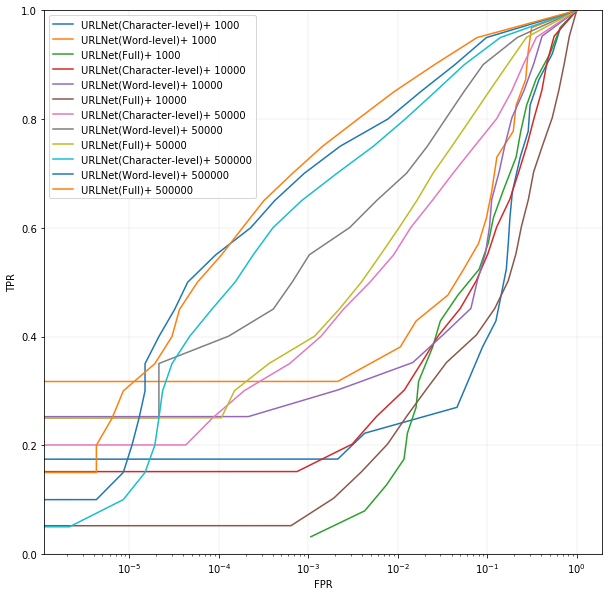

OSError: [Errno 63] File name too long: '/Users/aloha/Projects/URLNet/plots/AUC, train size 500000, test size 500000_URLNet(Character-level)_URLNet(Word-level)_URLNet(Full)_URLNet(Character-level)_URLNet(Word-level)_URLNet(Full)_URLNet(Character-level)_URLNet(Word-level)_URLNet(Full)_URLNet(Character-level)_URLNet(Word-level)_URLNet(Full).png'

In [29]:
def plotauc(df):
    import matplotlib.pyplot as plt
    %matplotlib inline
    df_ = df

    fig, ax = plt.subplots(1,1, figsize = (10,10))
    legends = []
    for name, group in df_.groupby(["train_size", "embed_mode"]):
        embed_mode = int(group['embed_mode'].mean())
        expert_mode = int(group['expert_mode'].mean())
        legend = 'URLNet'
        
        if embed_mode == CHAR:
            color = 'royalblue'
            legend += '(Character-level)'
        elif embed_mode == WORD:
            color = 'blueviolet'
            legend += '(Word-level)'
        elif embed_mode == CHARWORD_AND_WORD_AND_CHAR:
            color = 'darkcyan'
            legend += '(Full)'
        else:
            raise Exception("unknown embed_mode %s" % embed_mode)
        legends.append(legend)
        linestyle = 'dashed'
        if expert_mode == 1:
            legend += "+ %s" % int(group['train_size'].mean())
            linestyle = 'solid'
        group.plot(x = 'FPR', y = 'TPR', ax = ax, label=legend, linestyle=linestyle)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.xscale('log')
    ax.set_ylim([0,1])
    ax.grid(which='major', linestyle='-', linewidth='0.1', color='grey')
    
    
    datasize = int(group['train_size'].mean())
    title = 'AUC, train size %d, test size %d' % (datasize, datasize)
    #plt.title(title)
    lgd = plt.legend( loc='best')
    plt.show()
    filename = '%s_%s' % (title, '_'.join(legends))
    fig.savefig(plot_path+'/%s.png' % filename, bbox='tight')
    return plt

emb_filter = ((df.embed_mode == CHAR) | ((df.embed_mode == WORD) & (df.delimit_mode == 0)) | (df.embed_mode == CHARWORD_AND_WORD_AND_CHAR))
df1 = df[emb_filter & df.expert_mode == 1]
plotauc(df1)

TypeError: must be str, not int

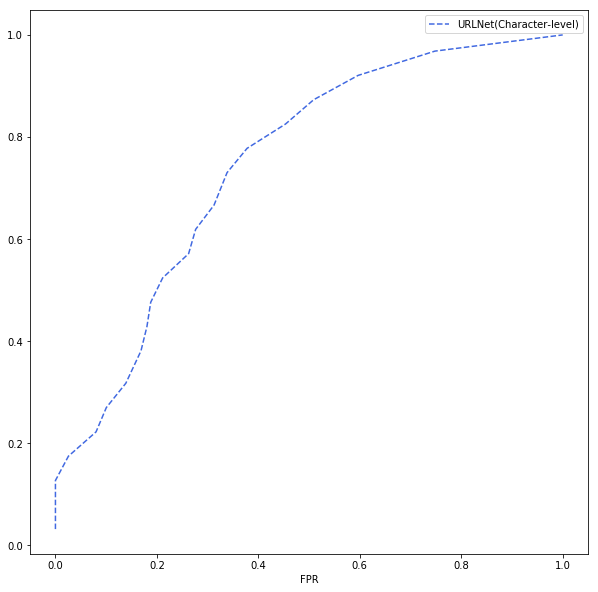

In [19]:
# plot all
for df in [df_small, df_med, df_large, df_full]:
    plotauc(df)


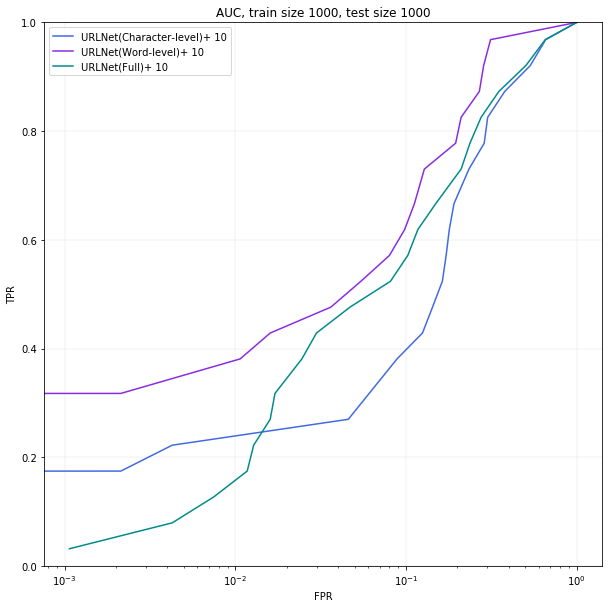

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [16]:
df.shape

(126, 10)

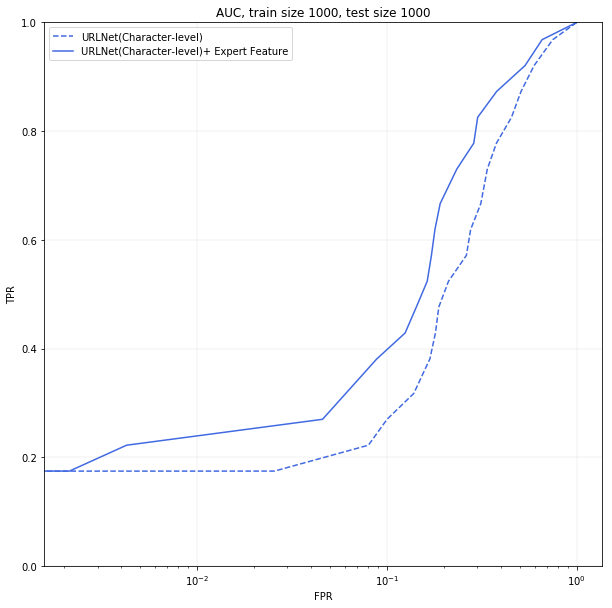

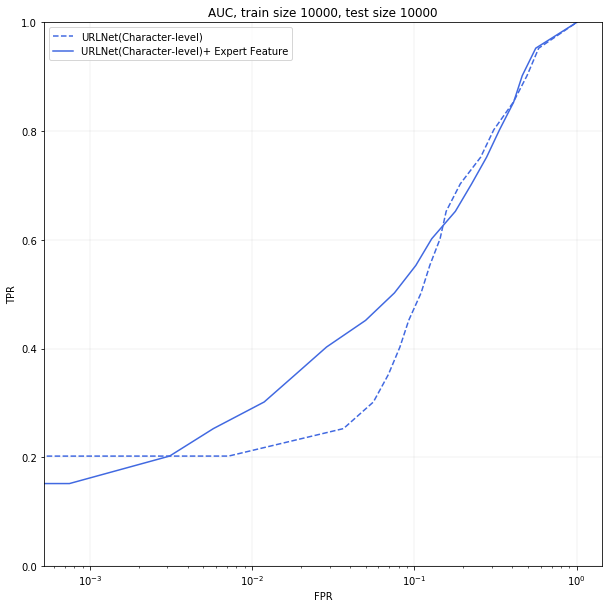

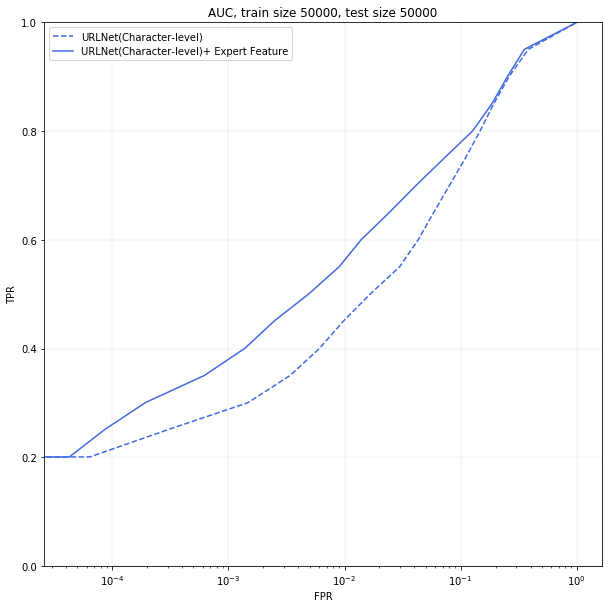

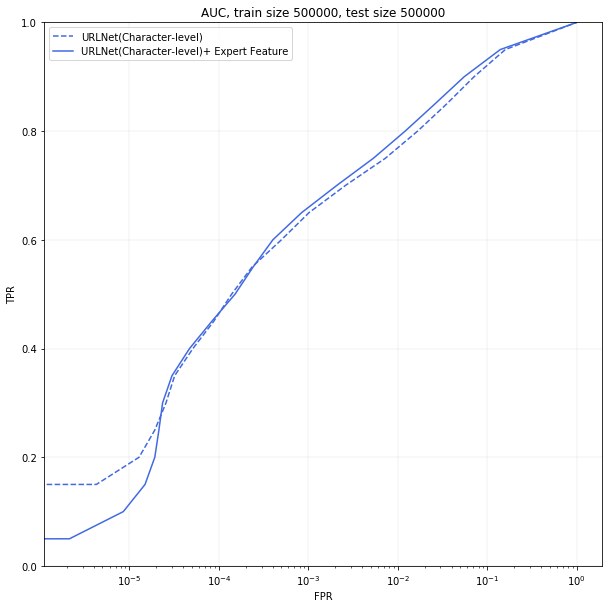

In [15]:
# compare only delimit mode=1
for df in [df_small, df_med, df_large, df_full]:
    dfp = df[(df.embed_mode == CHAR) ] 
    plotauc(dfp)

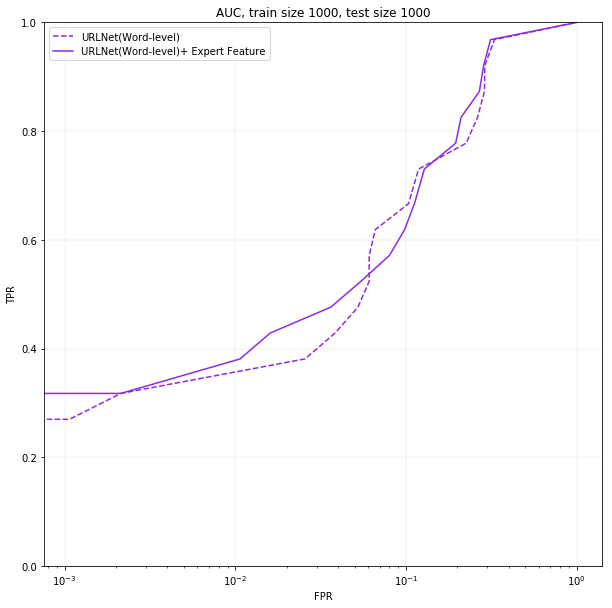

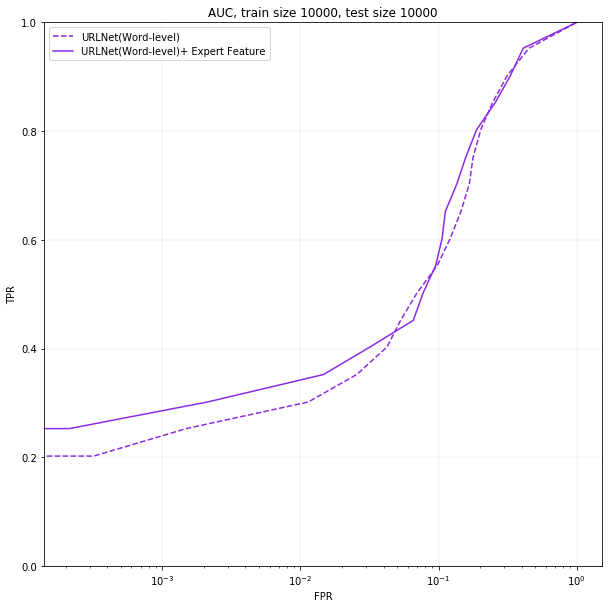

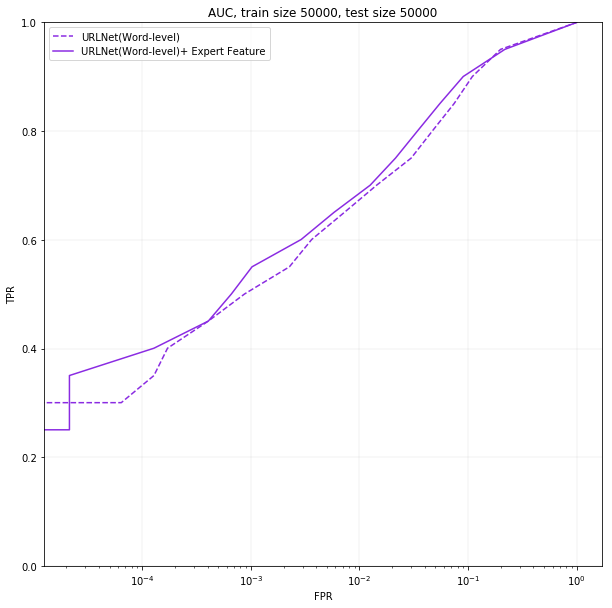

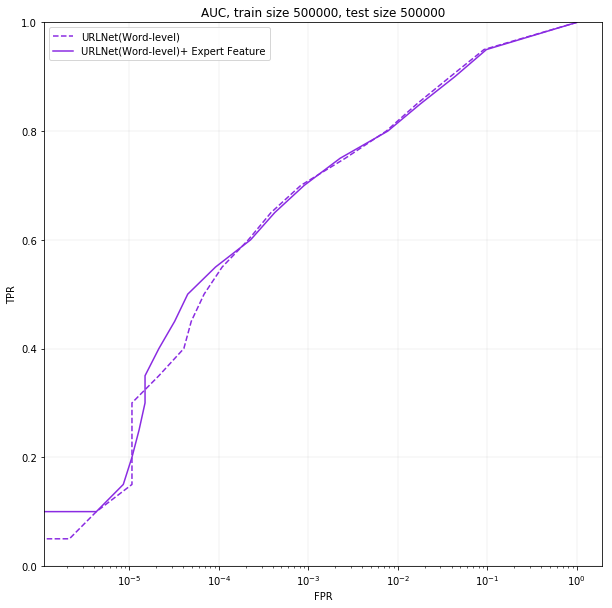

In [18]:
for df in [df_small, df_med, df_large, df_full]:
    dfp = df[(df.embed_mode == WORD) ] 
    plotauc(dfp)

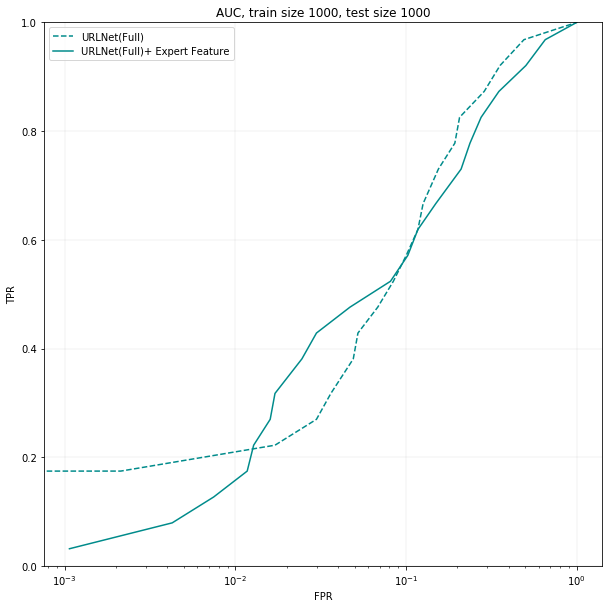

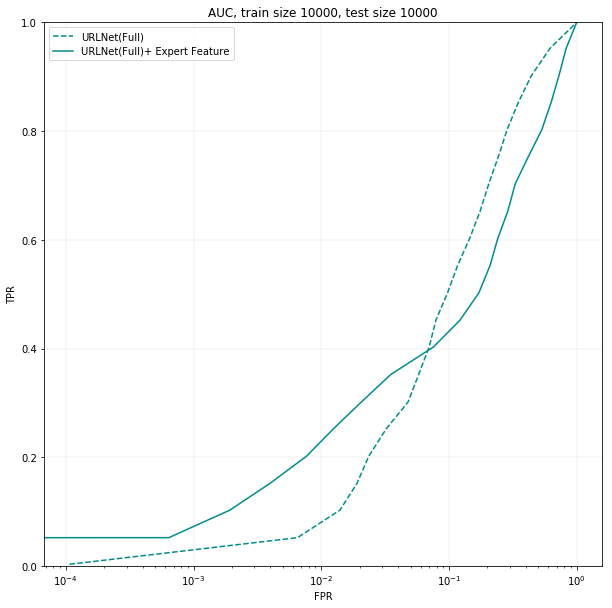

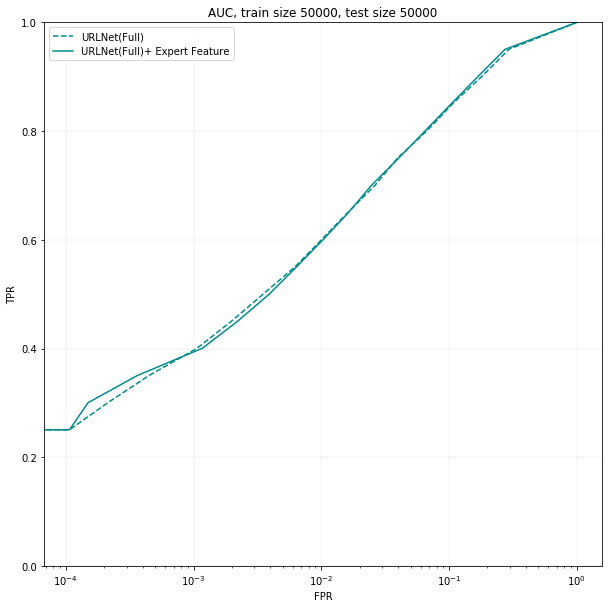

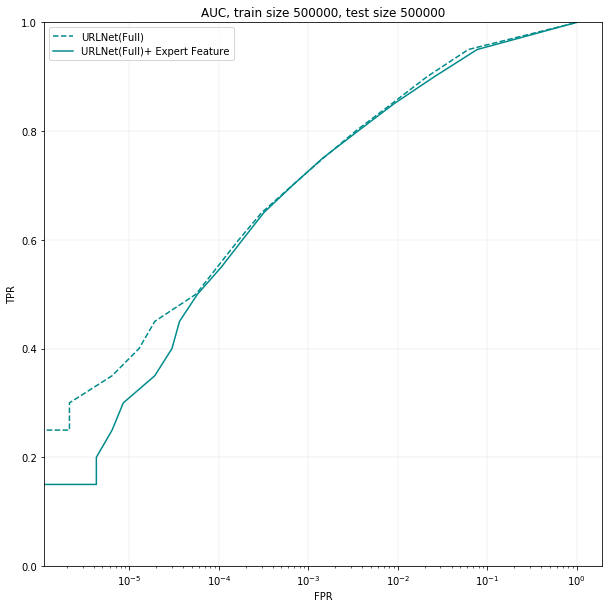

In [17]:
for df in [df_small, df_med, df_large, df_full]:
    dfp = df[(df.embed_mode == CHARWORD_AND_WORD_AND_CHAR) ] 
    plotauc(dfp)

In [19]:
# values of TPR when FPR is close to 0.1
dfp.loc[dfp[(dfp.FPR <= 0.1)].groupby(['folder'])['FPR'].idxmax()]

,decision_boundery,TP,FP,TPR,FPR,folder,train_size,embed_mode,delimit_mode,expert_mode
586,0.027270,30076,43066,0.950058,0.091954,500000_emb2_dlm0_32dim_minwf1_1conv3456_5ep_ex...,500000,2,0,0
607,0.026857,30076,45865,0.950058,0.097930,500000_emb2_dlm0_32dim_minwf1_1conv3456_5ep_ex...,500000,2,0,1


In [23]:
# values of TPR when FPR is close to 0.1
dfp.loc[dfp[(dfp.FPR <= 0.1)].groupby(['folder'])['FPR'].idxmax()]

,decision_boundery,TP,FP,TPR,FPR,folder,train_size,embed_mode,delimit_mode,expert_mode
586,0.027270,30076,43066,0.950058,0.091954,500000_emb2_dlm0_32dim_minwf1_1conv3456_5ep_ex...,500000,2,0,0
607,0.026857,30076,45865,0.950058,0.097930,500000_emb2_dlm0_32dim_minwf1_1conv3456_5ep_ex...,500000,2,0,1


In [22]:
# values of TPR when FPR is close to 0.1
dfp.loc[dfp[(dfp.FPR <= 0.1)].groupby(['folder'])['FPR'].idxmax()]

,decision_boundery,TP,FP,TPR,FPR,folder,train_size,embed_mode,delimit_mode,expert_mode
586,0.027270,30076,43066,0.950058,0.091954,500000_emb2_dlm0_32dim_minwf1_1conv3456_5ep_ex...,500000,2,0,0
607,0.026857,30076,45865,0.950058,0.097930,500000_emb2_dlm0_32dim_minwf1_1conv3456_5ep_ex...,500000,2,0,1


In [21]:
df.shape

(126, 10)

In [20]:
# use df_a instead
df_small_svm = df_a[(df_a.train_size == 1000) & df_a.folder.str.contains("l1")]
df_med_svm = df_a[(df_a.train_size == 10000) & df_a.folder.str.contains("l1")]
df_large_svm = df_a[(df_a.train_size == 50000) & df_a.folder.str.contains("l1")]
df_full_svm = df_a[(df_a.train_size == 500000) & df_a.folder.str.contains("l1")]

In [24]:
df_small_svm.head()

,decision_boundery,TP,FP,TPR,FPR,folder,train_size,embed_mode,delimit_mode,expert_mode
1176,5.079516,2,0,0.036364,0.000000,1000_l1plot.auc,1000,0,0,0
1177,3.155643,4,0,0.072727,0.000000,1000_l1plot.auc,1000,0,0,0
1178,2.185258,7,0,0.127273,0.000000,1000_l1plot.auc,1000,0,0,0
1179,1.071953,10,0,0.181818,0.000000,1000_l1plot.auc,1000,0,0,0
1180,0.260591,13,2,0.236364,0.002116,1000_l1plot.auc,1000,0,0,0


In [26]:
# for table 3

# emb_filter_tfpr = ((tfpr.embed_mode == CHAR) | ((tfpr.embed_mode == WORD) & (tfpr.delimit_mode == 0)) | (tfpr.embed_mode == CHARWORD_AND_WORD_AND_CHAR))
tfpr[(tfpr.train_size == 50000) & (tfpr.embed_mode == CHAR) & (tfpr.expert_mode == 0)]

,FPR,TPR,folder,train_size,embed_mode,delimit_mode,expert_mode
234,0.00001,0.182306,50000_emb1_dlm0_32dim_minwf1_1conv3456_5ep_exp...,50000,1,0,0
235,0.00010,0.212954,50000_emb1_dlm0_32dim_minwf1_1conv3456_5ep_exp...,50000,1,0,0
236,0.00100,0.286888,50000_emb1_dlm0_32dim_minwf1_1conv3456_5ep_exp...,50000,1,0,0
237,0.01000,0.452765,50000_emb1_dlm0_32dim_minwf1_1conv3456_5ep_exp...,50000,1,0,0
238,0.10000,0.736177,50000_emb1_dlm0_32dim_minwf1_1conv3456_5ep_exp...,50000,1,0,0
239,1.00000,1.000000,50000_emb1_dlm0_32dim_minwf1_1conv3456_5ep_exp...,50000,1,0,0


In [25]:
tfpr[(tfpr.train_size == 500000) & (tfpr.embed_mode == CHAR) & (tfpr.expert_mode == 0)]

,FPR,TPR,folder,train_size,embed_mode,delimit_mode,expert_mode
150,0.00001,0.178002,500000_emb1_dlm0_32dim_minwf1_1conv3456_5ep_ex...,500000,1,0,0
151,0.00010,0.461920,500000_emb1_dlm0_32dim_minwf1_1conv3456_5ep_ex...,500000,1,0,0
152,0.00100,0.648166,500000_emb1_dlm0_32dim_minwf1_1conv3456_5ep_ex...,500000,1,0,0
153,0.01000,0.767571,500000_emb1_dlm0_32dim_minwf1_1conv3456_5ep_ex...,500000,1,0,0
154,0.10000,0.921629,500000_emb1_dlm0_32dim_minwf1_1conv3456_5ep_ex...,500000,1,0,0
155,1.00000,1.000000,500000_emb1_dlm0_32dim_minwf1_1conv3456_5ep_ex...,500000,1,0,0


In [28]:
tfpr[(tfpr.train_size == 50000) & ((tfpr.embed_mode == WORD) & (tfpr.delimit_mode == 0)) & (tfpr.expert_mode == 0)]

,FPR,TPR,folder,train_size,embed_mode,delimit_mode,expert_mode
246,0.00001,0.291311,50000_emb2_dlm0_32dim_minwf1_1conv3456_5ep_exp...,50000,2,0,0
247,0.00010,0.319431,50000_emb2_dlm0_32dim_minwf1_1conv3456_5ep_exp...,50000,2,0,0
248,0.00100,0.502370,50000_emb2_dlm0_32dim_minwf1_1conv3456_5ep_exp...,50000,2,0,0
249,0.01000,0.683728,50000_emb2_dlm0_32dim_minwf1_1conv3456_5ep_exp...,50000,2,0,0
250,0.10000,0.884360,50000_emb2_dlm0_32dim_minwf1_1conv3456_5ep_exp...,50000,2,0,0
251,1.00000,1.000000,50000_emb2_dlm0_32dim_minwf1_1conv3456_5ep_exp...,50000,2,0,0


In [30]:
tfpr[(tfpr.train_size == 500000) & ((tfpr.embed_mode == WORD) & (tfpr.delimit_mode == 0)) & (tfpr.expert_mode == 0)]

,FPR,TPR,folder,train_size,embed_mode,delimit_mode,expert_mode
162,0.00001,0.120258,500000_emb2_dlm0_32dim_minwf1_1conv3456_5ep_ex...,500000,2,0,0
163,0.00010,0.546167,500000_emb2_dlm0_32dim_minwf1_1conv3456_5ep_ex...,500000,2,0,0
164,0.00100,0.708311,500000_emb2_dlm0_32dim_minwf1_1conv3456_5ep_ex...,500000,2,0,0
165,0.01000,0.819787,500000_emb2_dlm0_32dim_minwf1_1conv3456_5ep_ex...,500000,2,0,0
166,0.10000,0.952017,500000_emb2_dlm0_32dim_minwf1_1conv3456_5ep_ex...,500000,2,0,0
167,1.00000,1.000000,500000_emb2_dlm0_32dim_minwf1_1conv3456_5ep_ex...,500000,2,0,0


In [33]:
tfpr[(tfpr.train_size == 50000) & (tfpr.embed_mode == CHARWORD_AND_WORD_AND_CHAR) & (tfpr.expert_mode == 0)]

,FPR,TPR,folder,train_size,embed_mode,delimit_mode,expert_mode
306,0.00001,0.204423,50000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_exp...,50000,5,1,0
307,0.00010,0.244866,50000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_exp...,50000,5,1,0
308,0.00100,0.395577,50000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_exp...,50000,5,1,0
309,0.01000,0.600000,50000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_exp...,50000,5,1,0
310,0.10000,0.842970,50000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_exp...,50000,5,1,0
311,1.00000,1.000000,50000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_exp...,50000,5,1,0


In [27]:
tfpr[(tfpr.train_size == 500000) & (tfpr.embed_mode == CHARWORD_AND_WORD_AND_CHAR) & (tfpr.expert_mode == 0)]

,FPR,TPR,folder,train_size,embed_mode,delimit_mode,expert_mode
222,0.00001,0.378021,500000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,5,1,0
223,0.00010,0.554727,500000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,5,1,0
224,0.00100,0.726095,500000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,5,1,0
225,0.01000,0.859304,500000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,5,1,0
226,0.10000,0.964716,500000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,5,1,0
227,1.00000,1.000000,500000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,5,1,0


In [29]:
tfpr[(tfpr.train_size == 50000) & (tfpr.embed_mode == CHARWORD_AND_WORD_AND_CHAR) & (tfpr.expert_mode == 1)]

,FPR,TPR,folder,train_size,embed_mode,delimit_mode,expert_mode
312,0.00001,0.228752,50000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_exp...,50000,5,1,1
313,0.00010,0.248025,50000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_exp...,50000,5,1,1
314,0.00100,0.396524,50000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_exp...,50000,5,1,1
315,0.01000,0.597788,50000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_exp...,50000,5,1,1
316,0.10000,0.843918,50000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_exp...,50000,5,1,1
317,1.00000,1.000000,50000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_exp...,50000,5,1,1


In [31]:
tfpr[(tfpr.train_size == 500000) & (tfpr.embed_mode == CHARWORD_AND_WORD_AND_CHAR) & (tfpr.expert_mode == 1)]

,FPR,TPR,folder,train_size,embed_mode,delimit_mode,expert_mode
228,0.00001,0.304198,500000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,5,1,1
229,0.00010,0.541965,500000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,5,1,1
230,0.00100,0.728275,500000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,5,1,1
231,0.01000,0.855798,500000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,5,1,1
232,0.10000,0.958966,500000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,5,1,1
233,1.00000,1.000000,500000_emb5_dlm1_32dim_minwf1_1conv3456_5ep_ex...,500000,5,1,1


In [47]:
print(auc[(auc.train_size == 50000) & (auc.embed_mode == CHAR) & (auc.expert_mode == 0)].drop('folder', axis = 1))
print(auc[(auc.train_size == 50000) & ((auc.embed_mode == WORD) & (auc.delimit_mode == 0))  & (auc.expert_mode == 0)].drop('folder', axis = 1))
print(auc[(auc.train_size == 50000) & (auc.embed_mode == CHARWORD_AND_WORD_AND_CHAR) & (auc.expert_mode == 0)].drop('folder', axis = 1))
print(auc[(auc.train_size == 50000) & (auc.embed_mode == CHARWORD_AND_WORD_AND_CHAR) & (auc.expert_mode == 1)].drop('folder', axis = 1))

         AUC  train_size  embed_mode  delimit_mode  expert_mode
39  0.914924       50000           1             0            0
         AUC  train_size  embed_mode  delimit_mode  expert_mode
41  0.962994       50000           2             0            0
         AUC  train_size  embed_mode  delimit_mode  expert_mode
51  0.947446       50000           5             1            0
         AUC  train_size  embed_mode  delimit_mode  expert_mode
52  0.950296       50000           5             1            1


In [48]:
print(auc[(auc.train_size == 500000) & (auc.embed_mode == CHAR) & (auc.expert_mode == 0)].drop('folder', axis = 1))
print(auc[(auc.train_size == 500000) & ((auc.embed_mode == WORD) & (auc.delimit_mode == 0))  & (auc.expert_mode == 0)].drop('folder', axis = 1))
print(auc[(auc.train_size == 500000) & (auc.embed_mode == CHARWORD_AND_WORD_AND_CHAR) & (auc.expert_mode == 0)].drop('folder', axis = 1))
print(auc[(auc.train_size == 500000) & (auc.embed_mode == CHARWORD_AND_WORD_AND_CHAR) & (auc.expert_mode == 1)].drop('folder', axis = 1))

         AUC  train_size  embed_mode  delimit_mode  expert_mode
25  0.973093      500000           1             0            0
         AUC  train_size  embed_mode  delimit_mode  expert_mode
27  0.980479      500000           2             0            0
         AUC  train_size  embed_mode  delimit_mode  expert_mode
37  0.985941      500000           5             1            0
         AUC  train_size  embed_mode  delimit_mode  expert_mode
38  0.984057      500000           5             1            1
